# New Fire. Task

# Dataset Information
This dataset is from a 2014 survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace. 

In [172]:
#################################################################################################################

# Сontent
### 1. Import
### 2. Upload & Research data
### 3. Visualization and cleaning data
### 4. The answer to the first question
#### 4.1. Country and 'obs_consequence' 
#### 4.2. Heatmap for each variables
### 5. Build model for prediction 'obs_consequence'. With country
#### 5.1. Prediction for modeling
#### 5.2. Split data
#### 5.3. Build model

In [173]:
#################################################################################################################

# Tools, wich i used:
- python3
- Anaconda
- Jupyter Notebook
- SciPy
- seaborn, plotly (visualization)
- classification (Decision Tree, LogisticRegression, RandomForest, lightgbm)

In [174]:
#################################################################################################################

# About my task. I need to answer the question
## Questions to answer:
- How does the frequency of mental health illness and attitudes (other factors in datasets) towards mental health vary by geographic location?
- What are the strongest predictors of mental health illness treatment?

In [175]:
#################################################################################################################

# Answers:

1.Сonclusions from the visualization:
- The largest number of respondents from the United States. They are relatively equally distributed. UK and Canada are too. 
- But indicators for other countries are not enough. 
- So, we can`t say that it depends on the location.We dont have enough information
- We need to pay attention on correlation with country. [no_employees: 0.31] , [work_interfere: -0.39]

2.We need to pay attention on next correlation:
- [coworkers / phys_health_consequence: 0.57], [mental_health_consequence: 0.51], [treatment / family_history: 0.49], [coworkers / leave: -0.577]
- I use LightgbmClassifier for prediction consequences for coworkers with mental health conditions in your workplace. So, this model takes into account the following indicators:

> age

> no_employees

> leave

> work_interfere


In [176]:
#################################################################################################################

# Сonclusion

###### So,
it is all. I think we should pay attention to the above-mentioned abstracts and collect more data.

In [177]:
#################################################################################################################

### 1. Import

In [178]:
# linear algebra
import numpy as np

# for data frame
import pandas as pd

In [179]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [180]:
import plotly.tools as tls
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [181]:
# for split train and test data

from sklearn.cross_validation import train_test_split

In [182]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [183]:
import lightgbm as lgb

In [184]:
# for decision tree

from IPython.display import Image  
from sklearn import tree
import pydotplus

### 2. Upload & Research data

In [185]:
# read data
df=pd.read_csv('survey_test.csv')

In [186]:
# output information about each row 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Data columns (total 27 columns):
Timestamp                    1261 non-null object
Age                          1261 non-null int64
Gender                       1261 non-null object
Country                      1261 non-null object
state                        745 non-null object
self_employed                1242 non-null object
family_history               1260 non-null object
treatment                    1261 non-null object
work_interfere               997 non-null object
no_employees                 1260 non-null object
remote_work                  1261 non-null object
tech_company                 1261 non-null object
benefits                     1260 non-null object
care_options                 1261 non-null object
wellness_program             1261 non-null object
seek_help                    1260 non-null object
anonymity                    1261 non-null object
leave                        1261 non-null obj

In [187]:
# shape dataframe
print(df.shape)

# first five row from dataframe
df.head()

(1261, 27)


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [188]:
# number of different features for each features

print(df.nunique())

Timestamp                    1246
Age                            55
Gender                         49
Country                        51
state                          45
self_employed                   2
family_history                  2
treatment                       2
work_interfere                  5
no_employees                    6
remote_work                     2
tech_company                    2
benefits                        3
care_options                    3
wellness_program                3
seek_help                       3
anonymity                       3
leave                           5
mental_health_consequence       3
phys_health_consequence         3
coworkers                       3
supervisor                      3
mental_health_interview         3
phys_health_interview           3
mental_vs_physical              5
obs_consequence                 2
comments                      163
dtype: int64


In [189]:
df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [190]:
df['Country'].unique()

array(['United States', 'Canada', 'United Kingdom', 'USA', 'Bulgaria',
       'France', 'usa', 'Portugal', 'Netherlands', 'The USA',
       'Switzerland', 'Poland', 'Australia', 'Germany', 'Russia',
       'Mexico', 'Brazil', 'Slovenia', 'Costa Rica', 'Austria', 'Ireland',
       'India', 'South Africa', 'Italy', 'Sweden', 'Colombia', 'Latvia',
       'Romania', 'Belgium', 'New Zealand', 'Zimbabwe', 'Spain',
       'Finland', 'Uruguay', 'Israel', 'Bosnia and Herzegovina',
       'Hungary', 'Singapore', 'Japan', 'Nigeria', 'Croatia', 'Norway',
       'Thailand', 'Denmark', 'Bahamas, The', 'Greece', 'Moldova',
       'Georgia', 'China', 'Czech Republic', 'Philippines'], dtype=object)

In [191]:
df['state'].unique()

array(['IL', 'IN', nan, 'TX', 'TN', 'MI', 'OH', 'CA', 'CT', 'MD', 'NY',
       'NC', 'MA', 'IA', 'PA', 'WA', 'WI', 'UT', 'NM', 'OR', 'FL', 'MN',
       'MO', 'AZ', 'CO', 'GA', 'DC', 'NE', 'WV', 'OK', 'KS', 'VA', 'NH',
       'KY', 'AL', 'NV', 'NJ', 'SC', 'VT', 'SD', 'ID', 'MS', 'RI', 'WY',
       'LA', 'ME'], dtype=object)

In [192]:
# find which columns contain any NaN value in Pandas dataframe
df.columns[df.isna().any()].tolist()

['state',
 'self_employed',
 'family_history',
 'work_interfere',
 'no_employees',
 'benefits',
 'seek_help',
 'comments']

#### I will not use these features

In [193]:
df = df.drop('Timestamp', 1)

df = df.drop('comments', 1)

df = df.drop('Gender', 1)

df = df.drop('state', 1)

### 3. Visualization and cleaning data

###### Age

/home/olexandr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning:

the raise_on_error=False keyword is deprecated, use errors='ignore' instead



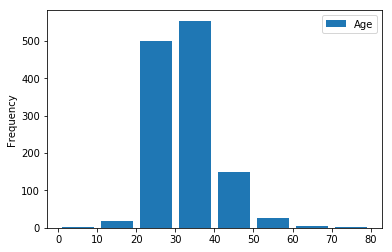

In [194]:
# row 'Age' => convert object to float
df['Age']= df['Age'].astype('float64', raise_on_error = False)


df[['Age']].plot(kind='hist',bins=[0,10,20,30,40,50, 60, 70, 80],rwidth=0.8)
plt.show()

###### self_employed
Are you self-employed?

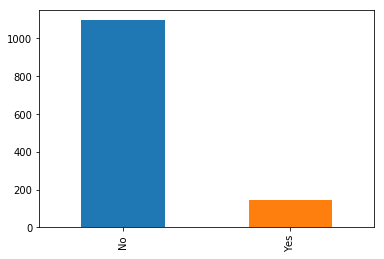

In [195]:
# plot for 'self_employed'

df['self_employed'].value_counts().plot.bar()
plt.show()

In [196]:
# We need encoding 'self_employed'. 

df['self_employed'] = df['self_employed'].map({
        'No': 0,
        'Yes': 1         
})

###### family_history
Do you have a family history of mental illness?

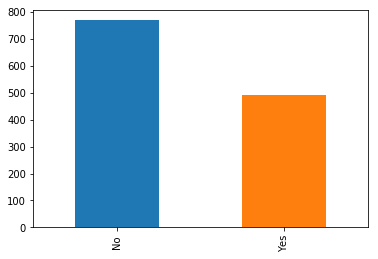

In [197]:
# plot for 'family_history'

df['family_history'].value_counts().plot.bar()
plt.show()

In [198]:
# We need encoding 'family_history'. 

df['family_history'] = df['family_history'].map({
        'No': 0,
        'Yes': 1         
})

###### treatment
Have you sought treatment for a mental health condition?

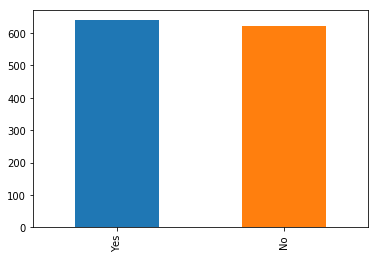

In [199]:
# plot for 'treatment'

df['treatment'].value_counts().plot.bar()
plt.show()

In [200]:
# We need encoding 'treatment'. 

df['treatment'] = df['treatment'].map({
        'No': 0,
        'Yes': 1         
})

###### work_interfere
If you have a mental health condition, do you feel that it interferes with your work?

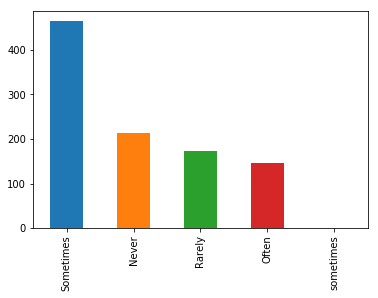

In [201]:
# plot for 'work_interfere'

df['work_interfere'].value_counts().plot.bar()
plt.show()

In [202]:
# encodding 'work_interfere'

def apply_work_interfere(s):
    if s == 'Never':
        return 0
    elif s == 'Rarely':
        return 1
    elif s == 'Sometimes':
        return 2
    elif s == 'sometimes':
        return 2
    elif s == 'Often':
        return 3

df['work_interfere'] = df['work_interfere'].apply(apply_work_interfere)

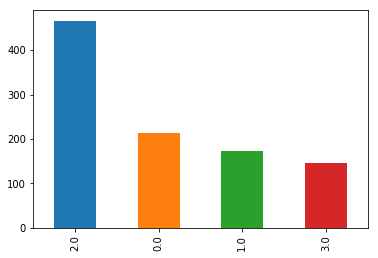

In [203]:
# plot for 'work_interfere'

df['work_interfere'].value_counts().plot.bar()
plt.show()

###### no_employees
How many employees does your company or organization have?

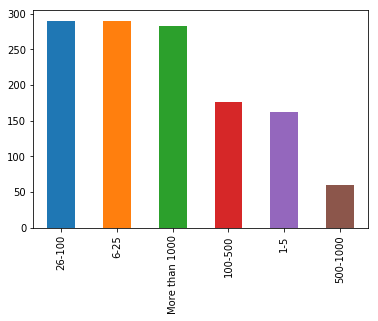

In [204]:
# plot for 'no_employees'

df['no_employees'].value_counts().plot.bar()
plt.show()

In [205]:
# encodding 'no_employees'

def apply_no_employees(s):
    if s == '1-5':
        return 0
    elif s == '6-25':
        return 1
    elif s == '26-100':
        return 2
    elif s == '100-500':
        return 3
    elif s == '500-1000':
        return 4
    elif s == 'More than 1000':
        return 5

df['no_employees'] = df['no_employees'].apply(apply_no_employees)

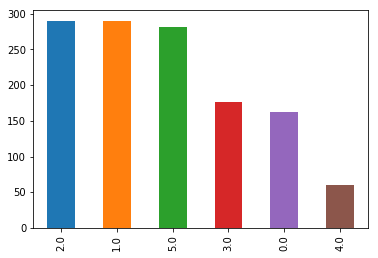

In [206]:
# plot for 'no_employees'

df['no_employees'].value_counts().plot.bar()
plt.show()

###### remote_work
Do you work remotely (outside of an office) at least 50% of the time?

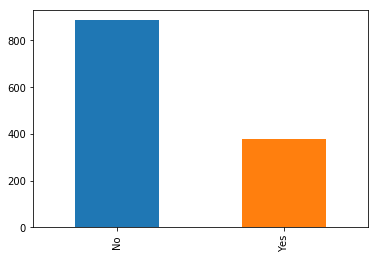

In [207]:
# plot for 'remote_work'

df['remote_work'].value_counts().plot.bar()
plt.show()

In [208]:
# We need encoding 'remote_work'. 

df['remote_work'] = df['remote_work'].map({
        'No': 0,
        'Yes': 1         
})

###### tech_company
Is your employer primarily a tech company/organization?

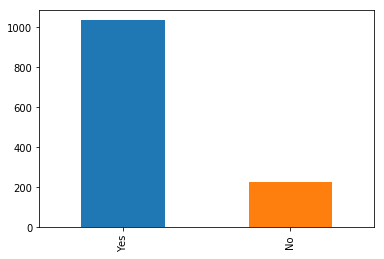

In [209]:
# plot for 'tech_company'

df['tech_company'].value_counts().plot.bar()
plt.show()

In [210]:
# We need encoding 'tech_company'. 

df['tech_company'] = df['tech_company'].map({
        'No': 0,
        'Yes': 1         
})

###### benefits
Does your employer provide mental health benefits?

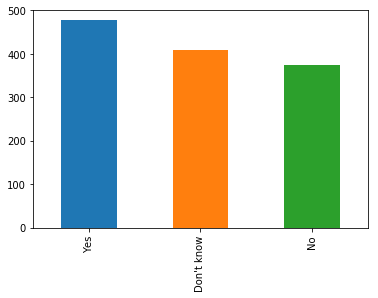

In [211]:
# plot for 'benefits'

df['benefits'].value_counts().plot.bar()
plt.show()

In [212]:
# We need encoding 'benefits'. 

df['benefits'] = df['benefits'].map({
        "No": 0,
        "Yes": 1, 
        "Don't know": 2
})

###### care_options
Do you know the options for mental health care your employer provides?

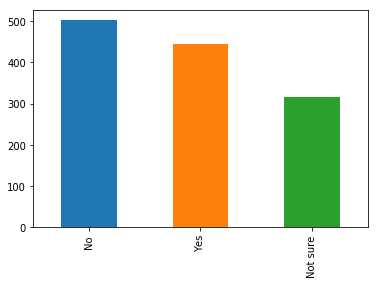

In [213]:
# plot for 'care_options'

df['care_options'].value_counts().plot.bar()
plt.show()

In [214]:
# We need encoding 'care_options'. 

df['care_options'] = df['care_options'].map({
        "No": 0,
        "Yes": 1, 
        "Not sure": 2
})

###### wellness_program
Has your employer ever discussed mental health as part of an employee wellness program?

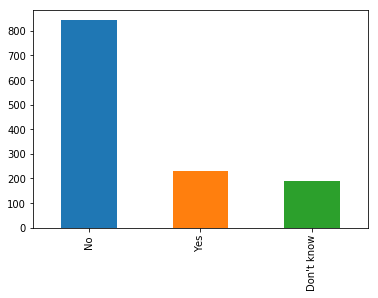

In [215]:
# plot for 'wellness_program'

df['wellness_program'].value_counts().plot.bar()
plt.show()

In [216]:
# We need encoding 'wellness_program'. 

df['wellness_program'] = df['wellness_program'].map({
        "No": 0,
        "Yes": 1, 
        "Don't know": 2
})

###### seek_help
Does your employer provide resources to learn more about mental health issues and how to seek help?

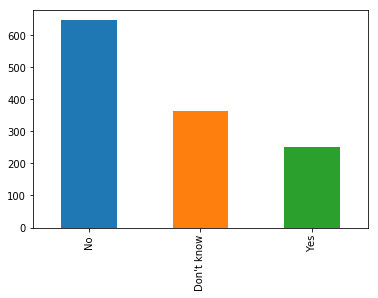

In [217]:
# plot for 'seek_help'

df['seek_help'].value_counts().plot.bar()
plt.show()

In [218]:
# We need encoding 'seek_help'. 

df['seek_help'] = df['seek_help'].map({
        "No": 0,
        "Yes": 1, 
        "Don't know": 2
})

###### anonymity
Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

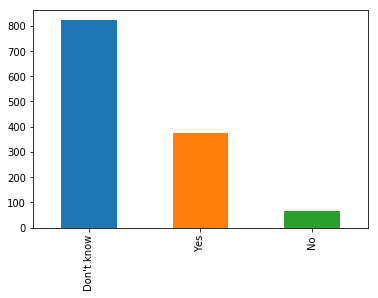

In [219]:
# plot for 'anonymity'

df['anonymity'].value_counts().plot.bar()
plt.show()

In [220]:
# We need encoding 'anonymity'. 

df['anonymity'] = df['anonymity'].map({
        "No": 0,
        "Yes": 1, 
        "Don't know": 2
})

###### leave
How easy is it for you to take medical leave for a mental health condition?

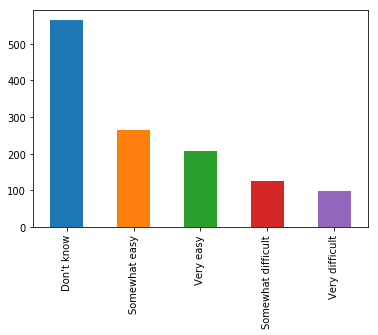

In [221]:
# plot for 'leave'

df['leave'].value_counts().plot.bar()
plt.show()

In [222]:
# We need encoding 'leave'. 

df['leave'] = df['leave'].map({
        "Very easy": 0,
        "Somewhat easy": 1, 
        "Somewhat difficult": 2,
        "Very difficult": 3,
        "Don't know": 4
})

###### mental_health_consequence
Do you think that discussing a mental health issue with your employer would have negative consequences?

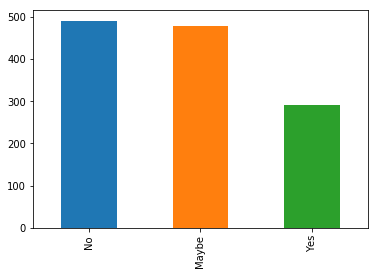

In [223]:
# plot for 'mental_health_consequence'

df['mental_health_consequence'].value_counts().plot.bar()
plt.show()

In [224]:
# We need encoding 'mental_health_consequence'. 

df['mental_health_consequence'] = df['mental_health_consequence'].map({
        "No": 0,
        "Maybe": 1, 
        "Yes": 2,
})

###### phys_health_consequence
Do you think that discussing a physical health issue with your employer would have negative consequences?

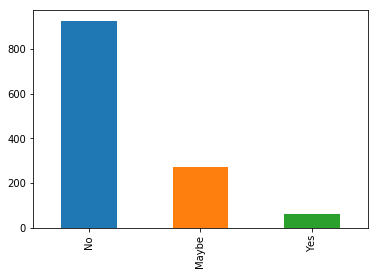

In [225]:
# plot for 'phys_health_consequence'

df['phys_health_consequence'].value_counts().plot.bar()
plt.show()

In [226]:
# We need encoding 'mental_health_consequence'. 

df['phys_health_consequence'] = df['phys_health_consequence'].map({
        "No": 0,
        "Maybe": 1, 
        "Yes": 2,
})

###### coworkers
Would you be willing to discuss a mental health issue with your coworkers?

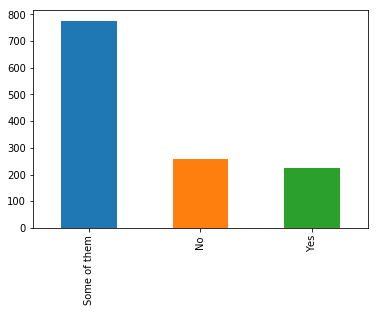

In [227]:
# plot for 'coworkers'

df['coworkers'].value_counts().plot.bar()
plt.show()

In [228]:
# We need encoding 'coworkers'. 

df['coworkers'] = df['coworkers'].map({
        "No": 0,
        "Some of them": 1, 
        "Yes": 2,
})

###### supervisor
Would you be willing to discuss a mental health issue with your direct supervisor(s)?

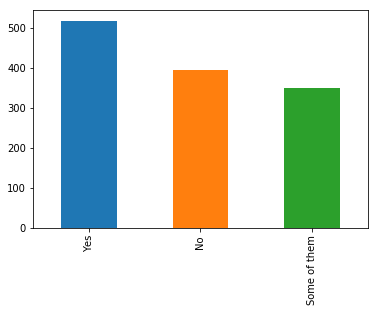

In [229]:
# plot for 'supervisor'

df['supervisor'].value_counts().plot.bar()
plt.show()

In [230]:
# We need encoding 'supervisor'. 

df['supervisor'] = df['supervisor'].map({
        "No": 0,
        "Some of them": 1, 
        "Yes": 2,
})

###### mental_health_interview
Would you bring up a mental health issue with a potential employer in an interview?

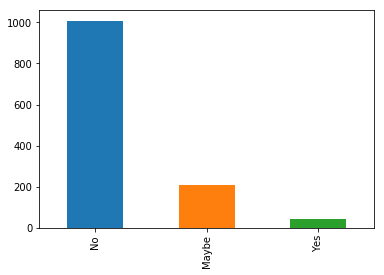

In [231]:
# plot for 'mental_health_interview'

df['mental_health_interview'].value_counts().plot.bar()
plt.show()


In [232]:
# We need encoding 'mental_health_interview'. 

df['mental_health_interview'] = df['mental_health_interview'].map({
        "No": 0,
        "Maybe": 1, 
        "Yes": 2,
})

###### phys_health_interview
Would you bring up a physical health issue with a potential employer in an interview?

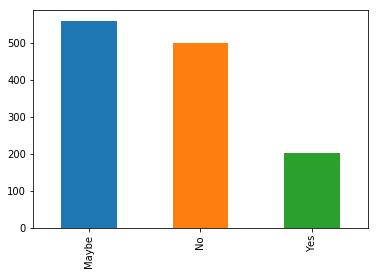

In [233]:
# plot for 'phys_health_interview'

df['phys_health_interview'].value_counts().plot.bar()
plt.show()

In [234]:
# We need encoding 'phys_health_interview'. 

df['phys_health_interview'] = df['phys_health_interview'].map({
        "No": 0,
        "Maybe": 1, 
        "Yes": 2,
})

###### obs_consequence
Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

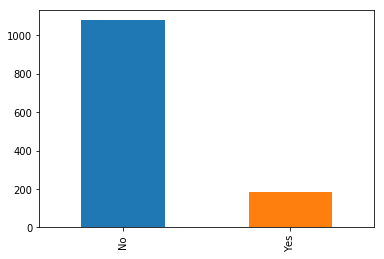

In [235]:
# plot for 'obs_consequence'

df['obs_consequence'].value_counts().plot.bar()
plt.show()

In [236]:
# We need encoding 'obs_consequence'. 

df['obs_consequence'] = df['obs_consequence'].map({
        "No": 0,
        "Yes": 1,
})

###### mental_vs_physical
Do you feel that your employer takes mental health as seriously as physical health?

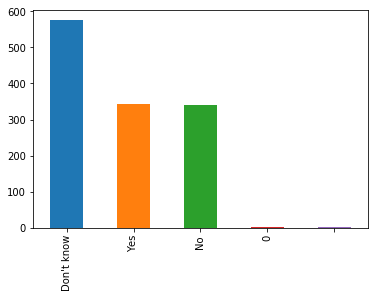

In [237]:
# plot for 'mental_vs_physical'

df['mental_vs_physical'].value_counts().plot.bar()
plt.show()

In [238]:
# encodding 'mental_vs_physical'

def apply_mental_vs_physical(s):
    if s == 'No':
        return 0
    elif s == "Yes":
        return 1
    elif s == "Don't know":
        return 2
    else:
        return 2
        
df['mental_vs_physical'] = df['mental_vs_physical'].apply(apply_mental_vs_physical)

#### Country

In [239]:
df['Country'].unique()

array(['United States', 'Canada', 'United Kingdom', 'USA', 'Bulgaria',
       'France', 'usa', 'Portugal', 'Netherlands', 'The USA',
       'Switzerland', 'Poland', 'Australia', 'Germany', 'Russia',
       'Mexico', 'Brazil', 'Slovenia', 'Costa Rica', 'Austria', 'Ireland',
       'India', 'South Africa', 'Italy', 'Sweden', 'Colombia', 'Latvia',
       'Romania', 'Belgium', 'New Zealand', 'Zimbabwe', 'Spain',
       'Finland', 'Uruguay', 'Israel', 'Bosnia and Herzegovina',
       'Hungary', 'Singapore', 'Japan', 'Nigeria', 'Croatia', 'Norway',
       'Thailand', 'Denmark', 'Bahamas, The', 'Greece', 'Moldova',
       'Georgia', 'China', 'Czech Republic', 'Philippines'], dtype=object)

In [240]:
# Convert 'USA','usa','The USA' to 'United States'

i = 0 
for c in df['Country']:
    if c == 'The USA':
        df['Country'][i] = 'United States'
    elif c == 'USA':
        df['Country'][i] = 'United States'
    elif c == 'usa':
        df['Country'][i] = 'United States'
    i = i + 1

/home/olexandr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/olexandr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/olexandr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [241]:
df['Country'].unique()

array(['United States', 'Canada', 'United Kingdom', 'Bulgaria', 'France',
       'Portugal', 'Netherlands', 'Switzerland', 'Poland', 'Australia',
       'Germany', 'Russia', 'Mexico', 'Brazil', 'Slovenia', 'Costa Rica',
       'Austria', 'Ireland', 'India', 'South Africa', 'Italy', 'Sweden',
       'Colombia', 'Latvia', 'Romania', 'Belgium', 'New Zealand',
       'Zimbabwe', 'Spain', 'Finland', 'Uruguay', 'Israel',
       'Bosnia and Herzegovina', 'Hungary', 'Singapore', 'Japan',
       'Nigeria', 'Croatia', 'Norway', 'Thailand', 'Denmark',
       'Bahamas, The', 'Greece', 'Moldova', 'Georgia', 'China',
       'Czech Republic', 'Philippines'], dtype=object)

In [242]:
df['obs_consequence'].unique()

array([0, 1])

### 4. The answer to the first question
###### How does the frequency of mental health illness and attitudes (other factors in datasets) towards mental health vary by geographic location?

I compare the location and the answer to the question 
'Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?'

##### 4.1. Country and 'obs_consequence'

In [243]:
total_country = df["Country"].value_counts()
obs_consequence_no = df[df["obs_consequence"] == 0]["Country"].value_counts()
obs_consequence_yes = df[df["obs_consequence"] == 1]["Country"].value_counts()

In [244]:
#First plot
trace0 = go.Bar(
    x=obs_consequence_no.index,
    y=obs_consequence_no.values,
    name="obs consequence| NO"
)

#Second plot
trace1 = go.Bar(
    x=obs_consequence_yes.index,
    y=obs_consequence_yes.values,
    name="obs consequence | YES"
)

#Third plot
trace2 = go.Bar(
    x=total_country.index,
    y=total_country.values,
    name="All Country"
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('No','Yes', "General country"))

#setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title="Mental health in different country",bargap=0.05)
iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3           -      ]



#### Сonclusion from the visualization
- The largest number of respondents from the United States. They are relatively equally distributed
- UK and Canada are too
- Indicators for other countries are not enough
- So, we can`t say that it depends on the location.We dont have enough information

##### 4.2. Heatmap for each variables

In [245]:
data = [
    go.Heatmap(
        z= df.corr().values,
        x= df.columns.values,
        y= df.columns.values,
        colorscale='Viridis',
        reversescale = False,
        text = True ,
        opacity = 1.0 )
]

layout = go.Layout(
    title='Pearson Correlation of features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

#### Сonclusion from the heat map:

####  I will pay attention to indicators that have a high correlation (>+-0.5):
- coworkers / phys_health_consequence: 0.57
- mental_health_consequence: 0.51
- treatment / family_history: 0.49
- coworkers / leave: -0.577

##### Correlation with country:
- no_employees: 0.31
- work_interfere: -0.39

### 5. Build model for prediction 'obs_consequence'. With country
I can build model for predict answer to the question:
##### obs_consequence
##### 'Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?'

##### 5.1. Prediction for modeling

In [246]:
df_with_country = df.copy()
df_with_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Data columns (total 23 columns):
Age                          1261 non-null float64
Country                      1261 non-null object
self_employed                1242 non-null float64
family_history               1260 non-null float64
treatment                    1261 non-null int64
work_interfere               997 non-null float64
no_employees                 1260 non-null float64
remote_work                  1261 non-null int64
tech_company                 1261 non-null int64
benefits                     1260 non-null float64
care_options                 1261 non-null int64
wellness_program             1261 non-null int64
seek_help                    1260 non-null float64
anonymity                    1261 non-null int64
leave                        1261 non-null int64
mental_health_consequence    1261 non-null int64
phys_health_consequence      1261 non-null int64
coworkers                    1261 non-null int

In [247]:
# We use one-hot-codding

df_with_country = pd.get_dummies(df_with_country, columns = ['Country'])

In [248]:
df_with_country.fillna(-999, inplace = True)

In [249]:
df_with_country.columns

Index(['Age', 'self_employed', 'family_history', 'treatment', 'work_interfere',
       'no_employees', 'remote_work', 'tech_company', 'benefits',
       'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'Country_Australia',
       'Country_Austria', 'Country_Bahamas, The', 'Country_Belgium',
       'Country_Bosnia and Herzegovina', 'Country_Brazil', 'Country_Bulgaria',
       'Country_Canada', 'Country_China', 'Country_Colombia',
       'Country_Costa Rica', 'Country_Croatia', 'Country_Czech Republic',
       'Country_Denmark', 'Country_Finland', 'Country_France',
       'Country_Georgia', 'Country_Germany', 'Country_Greece',
       'Country_Hungary', 'Country_India', 'Country_Ireland', 'Country_Israel',
       'Country_Italy', 'Country_Japan', 'Country_Latvia', 'Country_

In [250]:
df_with_country.columns[df_with_country.isna().any()].tolist()

[]

###### 5.2. Split data

In [251]:
y = df_with_country['obs_consequence']

print(y.shape)
y.head(5)

(1261,)


0    0
1    0
2    0
3    1
4    0
Name: obs_consequence, dtype: int64

In [252]:
df_with_country = df_with_country.drop('obs_consequence', 1)

In [253]:
# Split dataframe into random train and test subsets

X_train, X_test, Y_train, Y_test = train_test_split(
    df_with_country,
    y, 
    test_size = 0.1,
    random_state=42
)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(1134, 69) (1134,)
(127, 69) (127,)


##### 5.3. Build models

In [254]:
# Logistic Regression
# 14.17

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

acc_log = round(logreg.score(X_test, Y_test) * 100, 2)
acc_log

14.17

In [255]:
# Decision Tree
# 85

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

acc_decision_tree = round(decision_tree.score(X_test, Y_test) * 100, 2)
acc_decision_tree

81.1

In [256]:
# Create DOT data
# $ dot -Tpng tree.dot -o tree.png    (PNG format)

dot_data = tree.export_graphviz(decision_tree, out_file='tree.dot')

In [257]:
# Random Forest
# 87

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_test, Y_test) * 100, 2)
acc_random_forest

84.25

In [258]:
# LightGBM

lgb_train = lgb.Dataset(data=X_train, label=Y_train)
lgb_eval = lgb.Dataset(data=X_test, label=Y_test)

params = {
    'task': 'train', 
    'boosting_type': 'gbdt', 
    'objective': 'binary', 
    'metric': 'auc', 
    'learning_rate': 0.05, 
    'num_leaves': 32, 
    'num_iteration': 500, 
    'verbose': 0 
}

model = lgb.train(params, lgb_train, valid_sets=lgb_eval, early_stopping_rounds=100, verbose_eval=10)

/home/olexandr/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:99: UserWarning:

Found `num_iteration` in params. Will use it instead of argument



Training until validation scores don't improve for 100 rounds.
[10]	valid_0's auc: 0.697856
[20]	valid_0's auc: 0.721735
[30]	valid_0's auc: 0.738791
[40]	valid_0's auc: 0.734405
[50]	valid_0's auc: 0.704191
[60]	valid_0's auc: 0.711988
[70]	valid_0's auc: 0.700292
[80]	valid_0's auc: 0.70614
[90]	valid_0's auc: 0.697856
[100]	valid_0's auc: 0.690546
[110]	valid_0's auc: 0.689084
[120]	valid_0's auc: 0.712963
[130]	valid_0's auc: 0.7154
Early stopping, best iteration is:
[31]	valid_0's auc: 0.747076


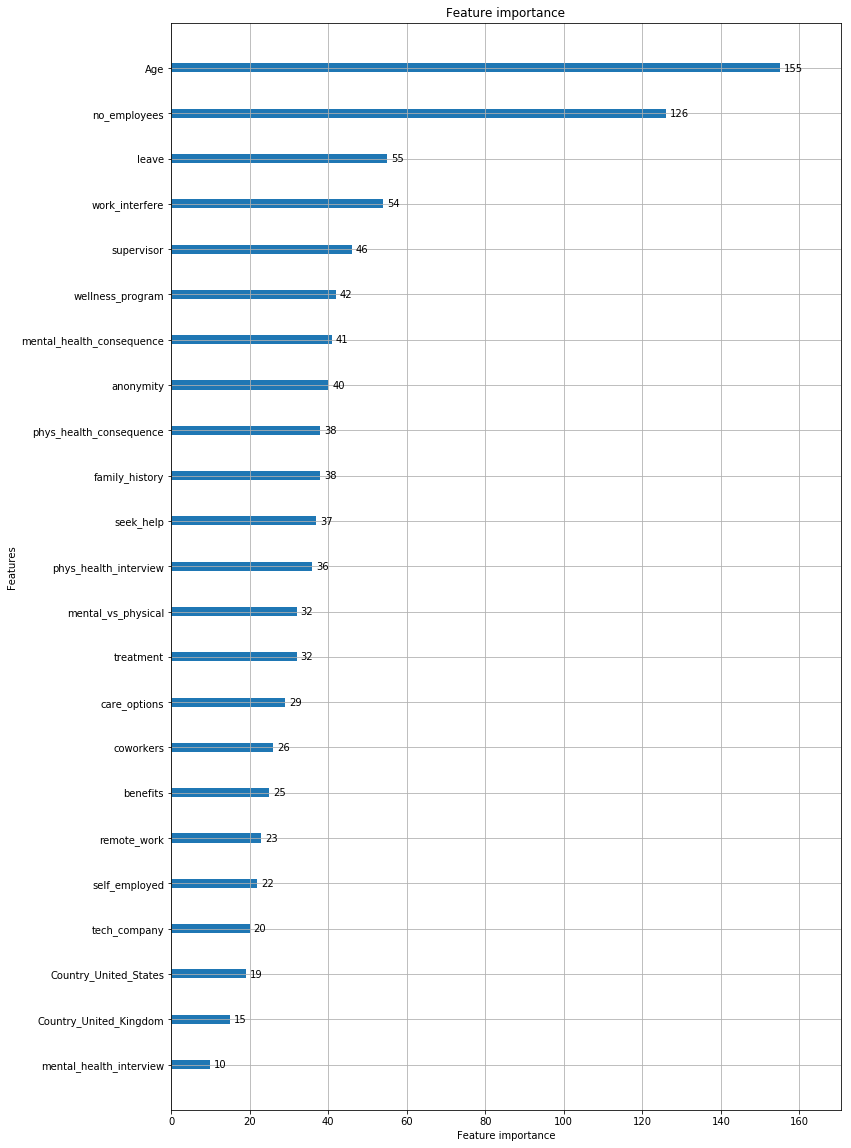

In [259]:
# Feature Importance

lgb.plot_importance(model, figsize=(12, 20));